In [1]:
%load_ext lab_black

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [5]:
from matplotlib import rcParams

rcParams["figure.figsize"] = 15, 6

In [6]:
from src import data

In [7]:
import scipy.io as sio
import pandas as pd
import IPython
import seaborn as sns

In [8]:
dkmat = sio.loadmat(f"{data.data_root}/external/COSMO_dk/COSMO_DK_crossSectional.mat")

In [9]:
colnames = [name[0] for name in dkmat["COSMO_DK_varnames"].squeeze()]

In [10]:
df = pd.DataFrame(data=dkmat["COSMO_DK"], columns=colnames)

In [11]:
df

,wave,CONSENT,AGE,GENDER,CHILDREN,NUM_CHILDREN,AGE_CHILD1,AGE_CHILD2,AGE_CHILD3,AGE_CHILD4,...,CLIMATE_FRIENDLY_ATTITUDES,CONDITION_CLIMATE,OPTIMISM_REACH_CLIMATE_GOALS,PERCEIVED_CONTROL_CLIMATE_CHANGE,PERCEPTION_OTHER_CLIMATE_CHANGE,VACCINATION_5C_1_PT,VACCINATION_5C_2_PT,VACCINATION_5C_3_PT,VACCINATION_5C_4_PT,VACCINATION_5C_5_PT
0,13.0,1.0,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13.0,1.0,1980.0,1.0,1.0,3.0,15.0,14.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13.0,1.0,NaN,1.0,1.0,2.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10351,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10352,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10353,20.0,1.0,1942.0,2.0,1.0,1.0,44.0,NaN,NaN,NaN,...,7.0,1.0,5.0,7.0,7.0,4.0,1.0,1.0,7.0,1.0
10354,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It is a bit unfortunate, that all data is in floats, but 🤷 

In [12]:
print(IPython.utils.text.columnize(list(df.columns), displaywidth=99))

wave                                USE_SOC_MEDIA             RESILIENCE1                        
CONSENT                             TRUST_POLICE              RESILIENCE2                        
AGE                                 TRUST_LOCAL_BUSINESS      RESILIENCE3                        
GENDER                              TRUST_HOSPITALS_DOCTORS   RESILIENCE4                        
CHILDREN                            TRUST_GOVERMENT           RESILIENCE5                        
NUM_CHILDREN                        TRUST_EXPERTS             RESILIENCE6                        
AGE_CHILD1                          TRUST_POLITICIANS         TECH_ISSUE1                        
AGE_CHILD2                          POL_FORCE_VACCINE         COVID_CONSPIRACY1                  
AGE_CHILD3                          POL_FORCE_EXAMINE         COVID_CONSPIRACY2                  
AGE_CHILD4                          POL_FORCE_QUARANTEEN      COVID_CONSPIRACY3                  
AGE_CHILD5          

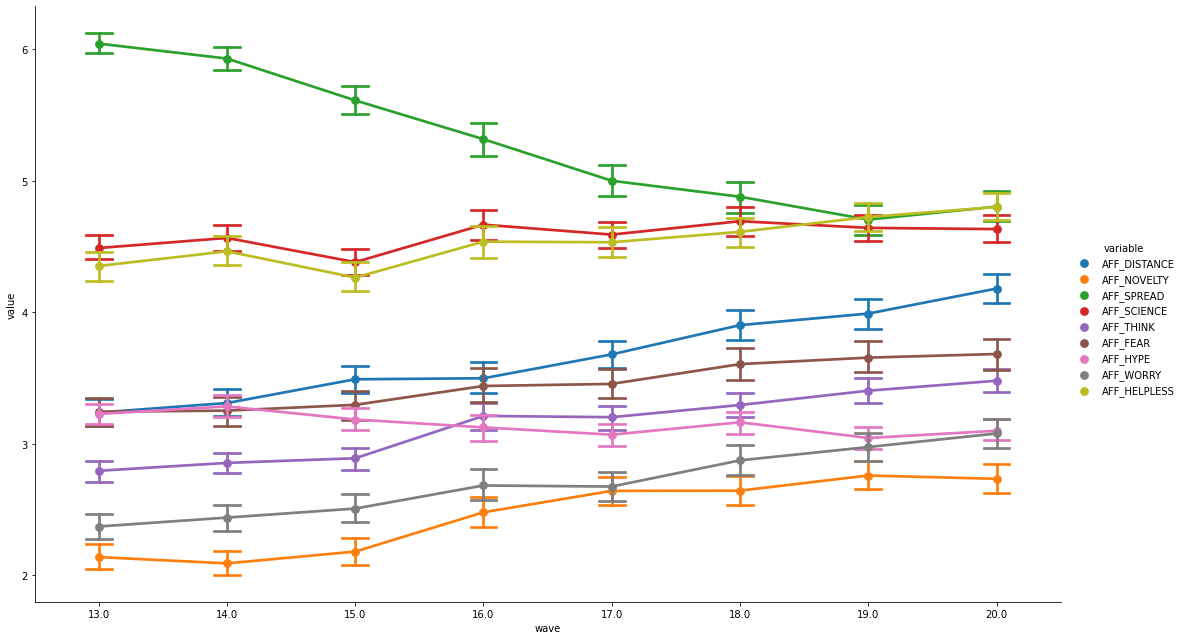

In [13]:
sns.catplot(
    data=df.filter(regex="wave|^AFF", axis=1).melt(
        "wave", var_name="variable", value_name="value"
    ),
    x="wave",
    y="value",
    hue="variable",
    kind="point",
    capsize=0.2,
    height=9,
    aspect=15 / 9,
)

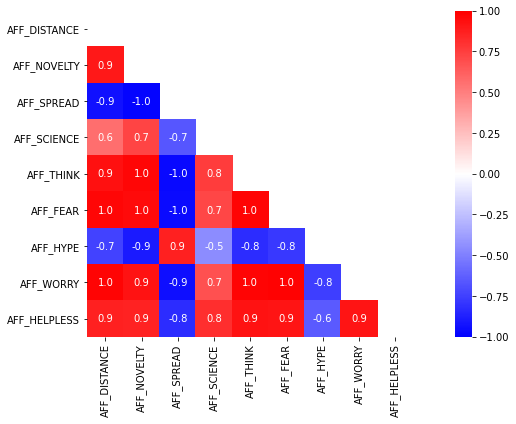

In [14]:
corr = df.filter(regex="wave|^AFF", axis=1).groupby("wave").mean().corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(
    corr, vmin=-1, vmax=1, cmap="bwr", annot=True, fmt=".1f", mask=mask, square=True
)

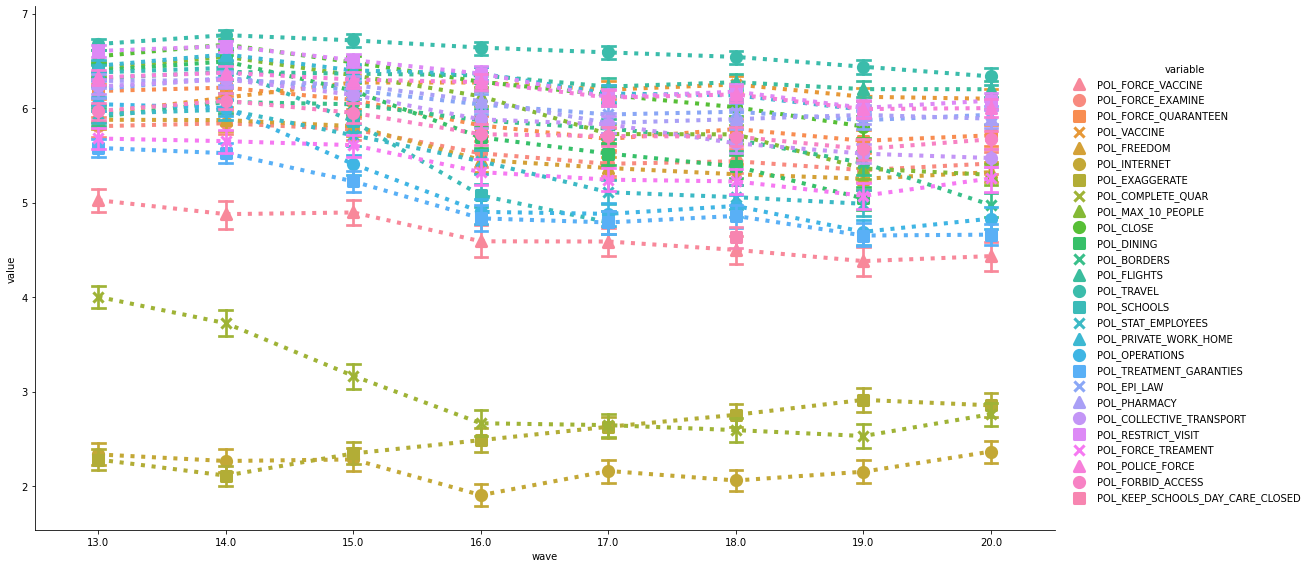

In [15]:
sns.catplot(
    data=df.filter(regex="wave|^POL_", axis=1).melt(
        "wave", var_name="variable", value_name="value"
    ),
    x="wave",
    y="value",
    hue="variable",
    kind="point",
    markers=["^", "o", "s", "x"] * 14,
    linestyles=[":"] * 56,
    capsize=0.1,
    height=8,
    aspect=15 / 8,
    scale=1.5,
)

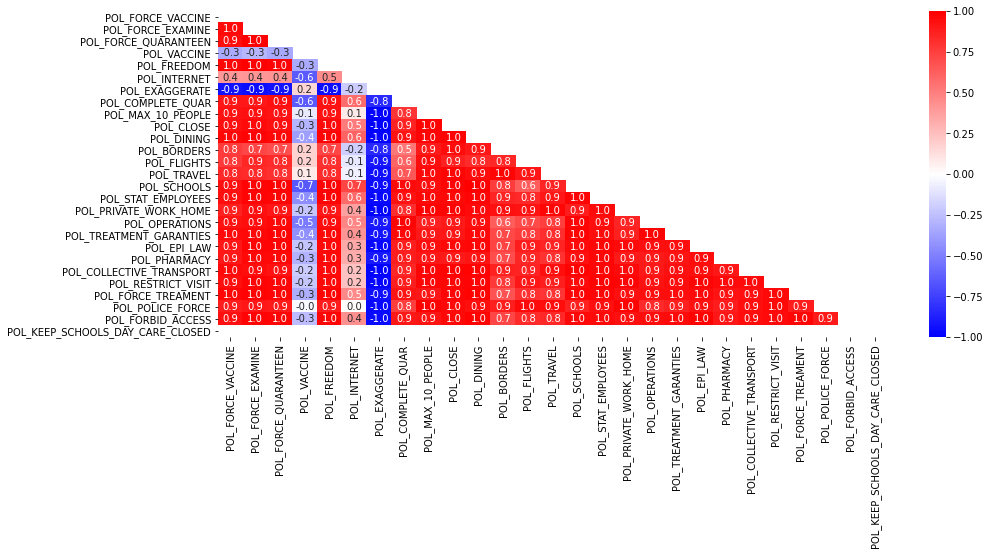

In [16]:
corr = df.filter(regex="wave|^POL_", axis=1).groupby("wave").mean().corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, vmin=-1, vmax=1, cmap="bwr", annot=True, fmt=".1f", mask=mask)

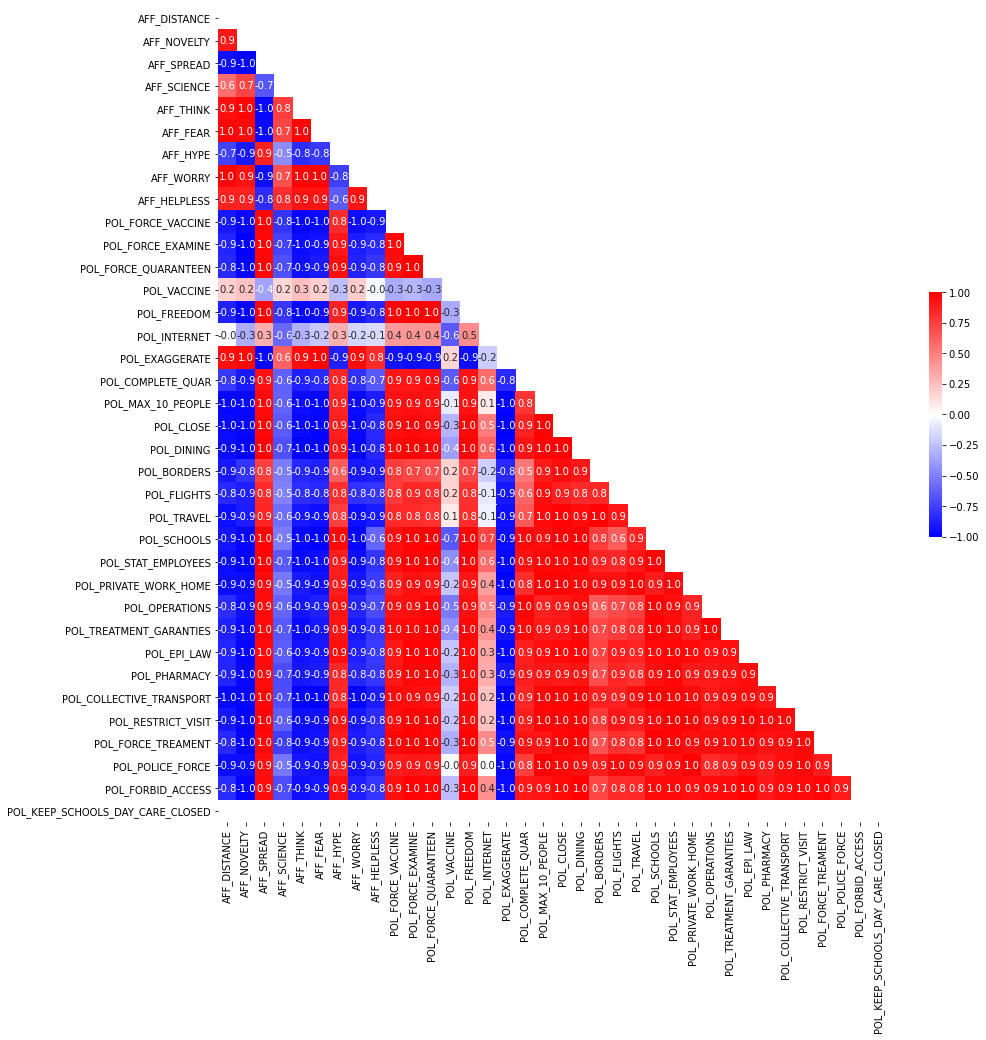

In [17]:
fig, ax = plt.subplots(figsize=(15, 15))


corr = df.filter(regex="wave|^POL_|^AFF_", axis=1).groupby("wave").mean().corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(
    corr,
    vmin=-1,
    vmax=1,
    cmap="bwr",
    annot=True,
    fmt=".1f",
    mask=mask,
    ax=ax,
    cbar_kws={"shrink": 0.3,},
)

In [18]:
from sklearn.decomposition import PCA

In [25]:
df_aff = (
    df.filter(regex="wave|^POL_|^AFF_", axis=1).groupby("wave").mean().dropna(axis=1)
)

In [21]:
df_aff

,AFF_DISTANCE,AFF_NOVELTY,AFF_SPREAD,AFF_SCIENCE,AFF_THINK,AFF_FEAR,AFF_HYPE,AFF_WORRY,AFF_HELPLESS,POL_FORCE_VACCINE,...,POL_TRAVEL,POL_OPERATIONS,POL_TREATMENT_GARANTIES,POL_EPI_LAW,POL_PHARMACY,POL_COLLECTIVE_TRANSPORT,POL_RESTRICT_VISIT,POL_FORCE_TREAMENT,POL_POLICE_FORCE,POL_FORBID_ACCESS
wave,,,,,,,,,,,,,,,,,,,,,
13.0,3.238417,2.139079,6.044402,4.489855,2.795564,3.245174,3.227799,2.371869,4.353224,5.024851,...,6.678184,6.041379,5.578373,6.199408,6.286982,6.229249,6.604926,5.678218,6.326430,5.970297
14.0,3.310999,2.091603,5.930730,4.566540,2.855709,3.253149,3.285176,2.439698,4.464736,4.877604,...,6.772087,6.002564,5.522639,6.320463,6.297055,6.304627,6.655484,5.649871,6.374036,6.077220
15.0,3.491613,2.181102,5.612613,4.382429,2.890886,3.297297,3.185567,2.508366,4.265122,4.895364,...,6.716907,5.406869,5.224138,6.187335,6.244415,6.139842,6.507227,5.607427,6.301837,5.950000
16.0,3.499241,2.479876,5.317629,4.667678,3.212670,3.440549,3.125758,2.683812,4.538462,4.590139,...,6.640244,4.901690,4.833078,6.038226,6.075038,5.880551,6.364885,5.322581,6.275229,5.723242
17.0,3.680934,2.642857,5.001300,4.591917,3.203368,3.456437,3.070130,2.675746,4.533766,4.587684,...,6.589096,4.880537,4.789544,5.932271,5.842876,5.828000,6.117021,5.242303,6.110963,5.704150
18.0,3.903475,2.644562,4.879845,4.693798,3.295866,3.606959,3.164508,2.875000,4.612694,4.499338,...,6.541722,4.964096,4.858855,5.961385,5.883598,5.626984,6.174142,5.224000,6.144947,5.698138
19.0,3.991206,2.759740,4.706179,4.643127,3.404762,3.656211,3.045056,2.976220,4.725564,4.380519,...,6.437741,4.690629,4.651102,5.872587,5.928021,5.518088,6.002567,5.072258,5.989691,5.568123
20.0,4.181495,2.734394,4.804762,4.633652,3.480473,3.683649,3.100119,3.079290,4.801898,4.433455,...,6.335366,4.830488,4.660562,5.929268,5.887942,5.471446,6.078979,5.255528,6.000000,5.669915


In [22]:
pca_aff = PCA(n_components=1)
aff = pca_aff.fit_transform(df_aff.values)

In [23]:
pca_aff.components_

array([[-0.20903489, -0.18450859,  0.34571081, -0.04711809, -0.17126583,
        -0.11555489,  0.04829288, -0.16326655, -0.10140366,  0.15557881,
         0.13334695,  0.15149908, -0.02426102,  0.17844538,  0.03384185,
        -0.18641832,  0.34871507,  0.31048428,  0.19233839,  0.04131964,
         0.08604717,  0.34502654,  0.24525912,  0.10371624,  0.12271152,
         0.21139921,  0.16585379,  0.14842739,  0.09309762,  0.1152775 ]])

In [26]:
pca_aff.explained_variance_ratio_

array([0.89554298])

In [27]:
aff -= aff[0]

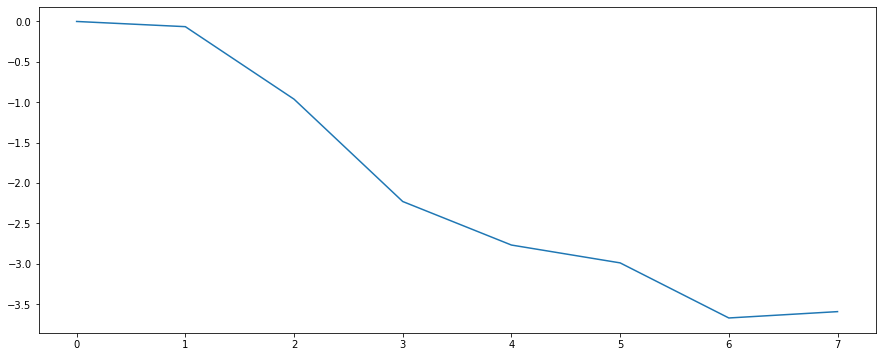

In [28]:
plt.plot(aff)